# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [29]:
# Import your libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [5]:
# Your code here
mean= 50
std = 5
sample_size = [10, 50, 500, 5000]
sample_lst = []

for size in sample_size:
    sample_lst.append(np.random.normal(mean, std, size))

In [10]:
k2, p = [], []
for sample in sample_lst:
    k2_, p_ = stats.normaltest(sample)
    k2.append(k2_)
    p.append(p_)

In [15]:
alpha = 0.05
for p_ in p:
    if p_ > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


#### Interpret the normaltest results and make your observations.

The p-value is interpreted against an alpha of 5% and finds that the 4 test datasets does not significantly deviate from normal.

#### Step 2: Plot normal distributions

Use matplotlib to plot a histogram of each sample. 

*Hints:*

- Your outputs should look like below:

![normal distributions with different sample sizes](ch-1.png)

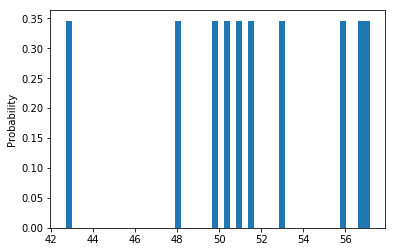

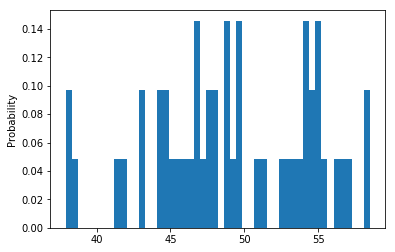

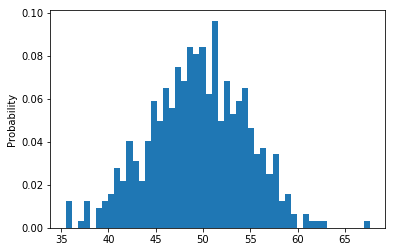

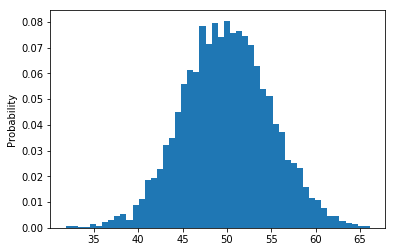

In [22]:
# Your code here
for sample in sample_lst:
    plt.hist(sample, normed=True, bins=50)
    plt.ylabel('Probability')
    plt.show()

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

As the sample sizes get larger, the distribution of means calculated from repeated sampling will approach normality. 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

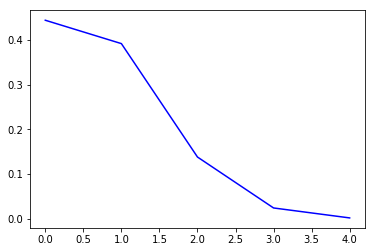

In [48]:
# Your code here

n, p = 5, 0.15

x = [n for n in range(n)]

plt.plot(x, stats.binom.pmf(x, n, p),'b')
plt.show()

#### Explain what you observe from the plot above

The probability of visitors clicking the ad reduces drastically after the second visitor.

#### Now plot PMP with 50, 500, and 5000 visitors.

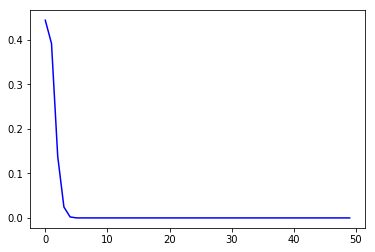

In [72]:
# Your code here
x = [n for n in range(50)]

plt.plot(x, stats.binom.pmf(x, n, p),'b')
plt.show()

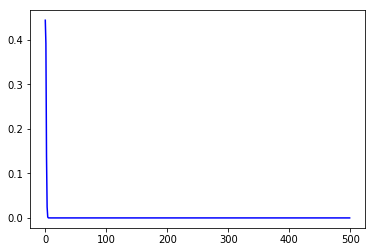

In [73]:
x = [n for n in range(500)]

plt.plot(x, stats.binom.pmf(x, n, p),'b')
plt.show()

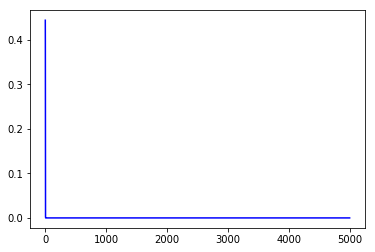

In [74]:
x = [n for n in range(5000)]

plt.plot(x, stats.binom.pmf(x, n, p),'b')
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

After the fifth visitor it becomes flat. This is normal because there's no more visitors.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

A Poisson distribution is a tool that helps to predict the probability of certain events from happening when you know how often the event has occurred.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

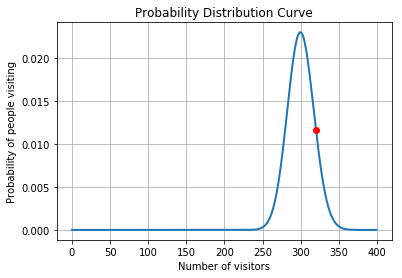

0.011612348610402475

In [104]:
# Your code here
plt.ylabel('Probability of people visiting')
plt.xlabel('Number of visitors')
plt.title('Probability Distribution Curve')
arr = []
mu = 300
rv = stats.poisson(mu)

for num in range(0,400):
    arr.append(rv.pmf(num))
    
prob = rv.pmf(320)
plt.grid(True)
plt.plot(arr, linewidth=2.0)
plt.plot([320], [prob], marker='o', markersize=6, color="red")
plt.show()
prob

#### What is the probability of getting 60 visits?

In [105]:
# Your code here
prob_1 = rv.pmf(60)
float("{:.8f}".format(float(prob_1)))

0.0

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

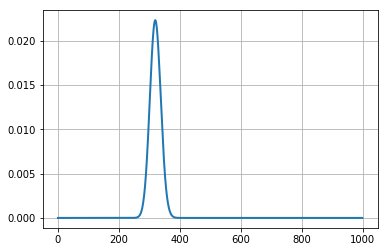

In [71]:
# your code here
arr_2 = []

for num in range(0,1000):
    arr_2.append(rv.pmf(num))
    
# print(rv.pmf(28))
#prob = rv.pmf(mu)
plt.grid(True)
plt.plot(arr_2, linewidth=2.0)
plt.show()

# Challenge 4 - Central Limit Theorem

#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [92]:
# Your answer here
mean = 35
std = 8
size = 200
sample = np.random.normal(mean, std, size)

mean_s, std_s = sample.mean(), sample.std()

# Probability it's LESS than 35 -> cumulative Density Function
less_35 = stats.norm.cdf(35, mean, std)

# Probability it's MORE than 30 -> Survival Function
more_30 = stats.norm.sf(30,mean,std)

# It's a intersection of probabilities so I multiply
more_30 * less_35

0.36700723547564973

In [ ]:
stats.norm(mean_s, std_s).pdf(34.5)

#### b. What is the probablity that in total, it takes more than 115 hours to deliver all 200 packages?

In [93]:
# Your answer here -> sf means Survival Function, return prob. that MORE than x will happen
stats.norm(mean_s, std_s).sf(34.5)

0.5395981516271946

## Challenge 5 - Normal Variables¶

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. X → N(200,40)

#### 1. Find the probability that the monthly sales are more than 300.

In [95]:
mean, std = 200, 40
stats.norm(mean, std).sf(300)

0.006209665325776132

#### 2. Find the probability that the monthly sales fall between 160 and 240.¶


In [96]:
# Probability it's LESS than 240 -> cumulative Density Function
less_240 = stats.norm.cdf(240, mean, std)

# Probability it's MORE than 160 -> Survival Function
more_160 = stats.norm.sf(160,mean,std)

# It's a intersection of probabilities so I multiply
less_240 * more_160

0.707860981737141

#### 3. Find the probability that the monthly sales do not exceed 150.¶


In [97]:
stats.norm.cdf(150, mean, std)

0.10564977366685535

#### 4. Find the probability that the monthly sales exceed 3000.¶

In [98]:
stats.norm.sf(3000,mean,std)

0.0

## Challenge 6 - Poisson distribution¶

The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.


#### 1.The probability that in a particular month there is no violent robbery.¶


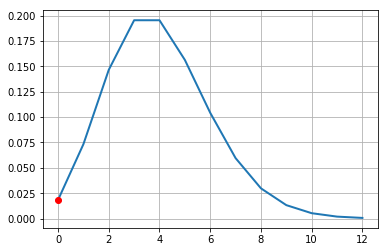

0.01831563888873418

In [107]:
arr = []
mu = 4
rv = stats.poisson(mu)

for num in range(0,13):
    arr.append(rv.pmf(num))
    
prob = rv.pmf(0)
plt.grid(True)
plt.plot(arr, linewidth=2.0)
plt.plot([0], [prob], marker='o', markersize=6, color="red")
plt.show()
prob

#### 2. The probability that there are at least 1 in a given month.¶


In [110]:
prob = rv.sf(1)
prob

0.9084218055563291

#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.¶


In [111]:
more_2 = rv.sf(2)
less_6 = rv.cdf(6)

more_2 * less_6

0.6775745561402963

#### 4. The probability that there more than two in 15 days.¶
